# Project: Count the Number of Coins in an image

**<div style="text-align: right"> [Total score : 10]</div>**

In this project, you will use OpenCV and sklearn to count the total value of all the coins in an image.


## The Data


Here is what an image that you will work on looks like:

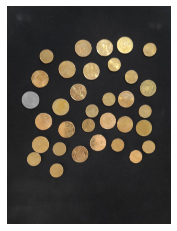

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('coins.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

And here is what `data.csv` looks like:

In [61]:
import pandas as pd

coins_df = pd.read_csv('1-P-8-coins_data.csv')
coins_df.head()

,radius,mean_hue,mean_saturation,mean_value,label
0,1.767867,0.0,0.0,97.1,0
1,0.500100,0.0,0.0,94.5,0
2,1.118134,0.0,0.0,95.0,0
3,1.118134,0.0,0.0,97.5,0
4,1.000100,0.0,0.0,95.5,0


The features in the dataset are:

1. `radius`: radius of the minimum enclosing circle of a contour in pixels
2. `mean_hue`: mean of the hue of all the pixels inside a contour
3. `mean_saturation`: mean of the saturation of all the pixels inside a contour
4. `mean_value`: mean of the value of all the pixels inside a contour
5. `label`: the class the circle belongs to
    * Not a coin (class 0)
    * One rupee coin (class 1)
    * Two rupees coin (class 2)

The images and dataset are © Fuse.ai, 2019.

## Task Breakdown

Let's breakdown what you will do in this project. You will

1. Use color thresholding to mask out the black backgrounds in the image to form a mask of all foreground objects. [1 point]

2. Find contours on the mask of foreground objects. [1 point]

3. For each contour, find the radius of its minimum enclosing circle. [1 point]

4. Find the mean HSV values for each contours. [2 points]

5.  Use the data in `data.csv` to train a classifier of your choice that classifies circles based on their radii and mean HSV color values. [2 points]

6. Use this classifier to classify each circle in the given image (from step 3 and 4). [1 point]

7. Count the total money (in rupees) in the image. [2 points]

## Exercises

### Exercise 1: Mask out the background
<b><div style="text-align: right">[POINTS: 1]</div></b>
Use color filtering to build a mask of the foreground objects by thresholding out the black background. Use a suitable morphological operation to smooth the mask out if necessary. 

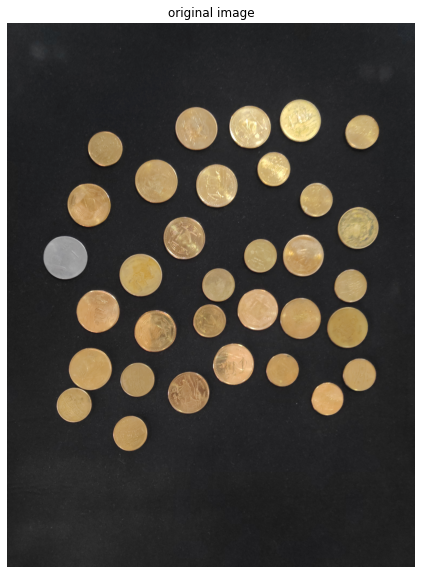

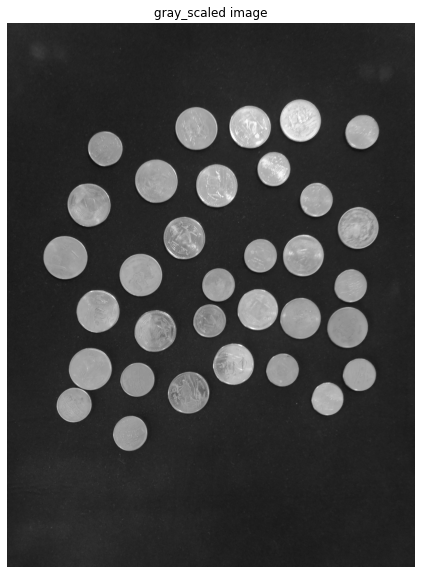

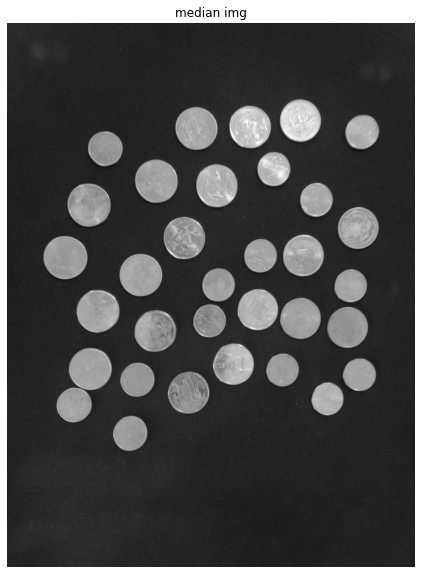

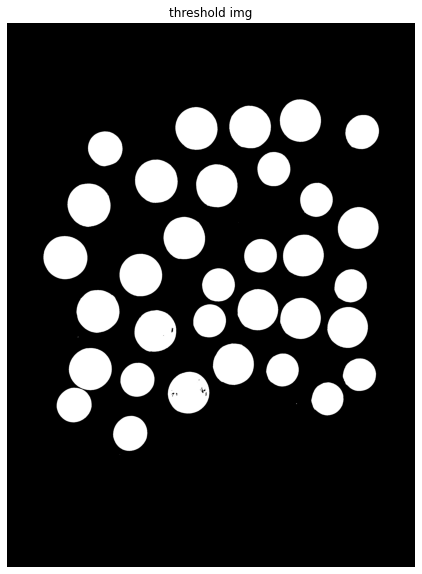

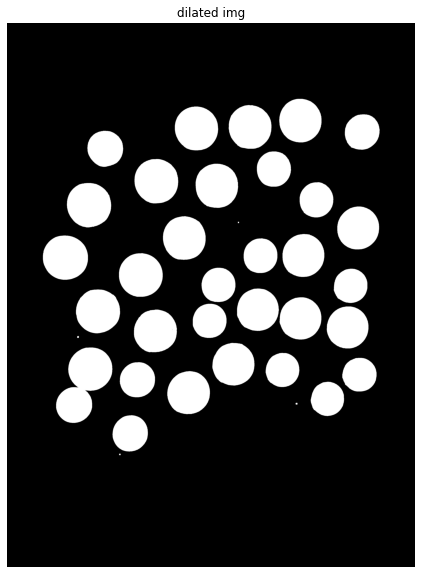

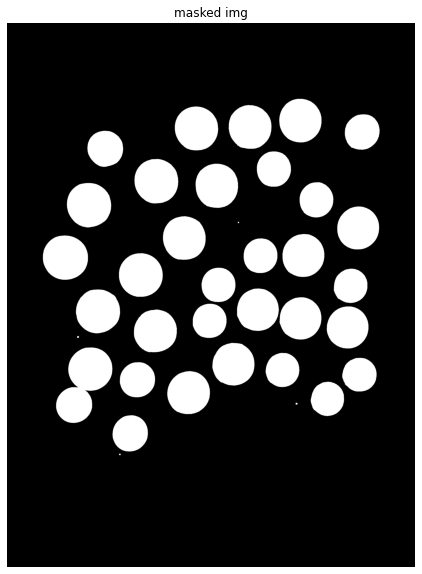

In [62]:
coins_mask = None

# YOUR CODE HERE
img1 = image.copy()
plt.figure(figsize=[10,10])
plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()

gray_img = cv2.imread('coins.jpg',0)
gray_img = cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10,10])
plt.imshow(gray_img)
plt.title('gray_scaled image')
plt.axis('off')
plt.show()

median = cv2.medianBlur(gray_img, 3)
plt.figure(figsize=[10,10])
plt.imshow(median)
plt.title('median img')
plt.axis('off')
plt.show()

_,th = cv2.threshold(median, 100, 255, cv2.THRESH_BINARY)
plt.figure(figsize=[10,10])
plt.imshow(th)
plt.title('threshold img')
plt.axis('off')
plt.show()

kernel = np.ones((3,3),np.uint8)

dilation = cv2.dilate(th, kernel, iterations= 4)
plt.figure(figsize=[10,10])
plt.imshow(dilation)
plt.title('dilated img')
plt.axis('off')
plt.show()


coins_mask = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=[10,10])
plt.imshow(coins_mask)
plt.title('masked img')
plt.axis('off')
plt.show()




In [ ]:
# hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower_yellow = np.array([0,100,100])
# upper_yellow = np.array([100,150,150])

# mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
# result = cv2.bitwise_and(image, image, mask=mask)

# plt.figure(figsize=[8,8])
# plt.imshow(result)
# plt.axis('off')
# plt.show()

In [63]:

assert not coins_mask is None


### Exercise 2: Find all the contours in `coins_mask`
<b><div style="text-align: right">[POINTS: 1]</div></b>
Find all the contours in `coins_mask`.

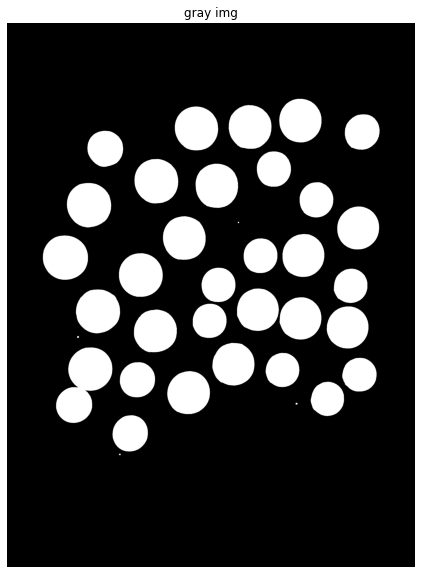

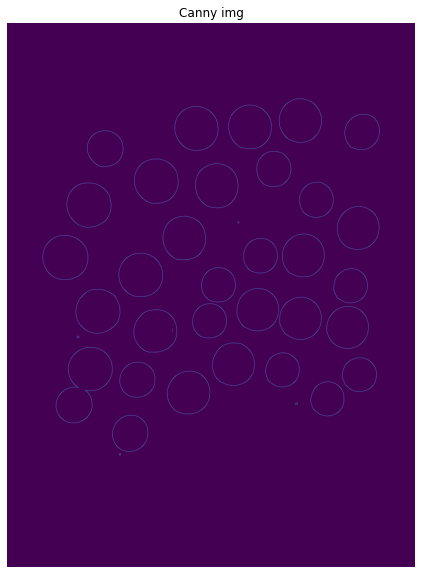

In [64]:

gray_scaled = cv2.cvtColor(coins_mask, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10,10])
plt.imshow(gray_scaled)
plt.title('gray img')
plt.axis('off')
plt.show()

edged = cv2.Canny(gray_scaled,200,100)
plt.figure(figsize=[10,10])
plt.imshow(edged)
plt.title('Canny img')
plt.axis('off')
plt.show()

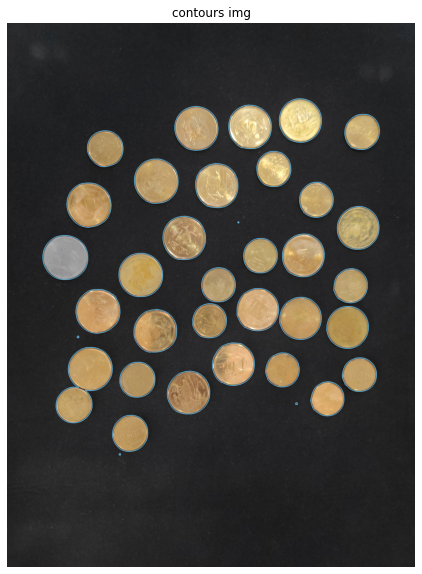

no. of contours: 38


In [65]:
contours = None
contours=[]
# YOUR CODE HERE
contours,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for i in range(0,len(contours)):
    cv2.drawContours(img1, contours[i], -1, (100,200,250), 3)

plt.figure(figsize=[10,10])
plt.imshow(img1)
plt.title('contours img')
plt.axis('off')
plt.show()
print(f'no. of contours: {len(contours)}')

In [66]:
assert not contours is None
assert len(contours)


### Exercise 3: Find the radii of the minimum enclosing circles for each circle
<b><div style="text-align: right">[POINTS: 1]</div></b>
Find the radius of the minimum enclosing circle of each of the contour in `contours` and append each of the radii to the list `radii`.

In [67]:
import math

In [68]:
radii = []

# YOUR CODE HERE
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    radius = math.sqrt(area/math.pi)
    radii.append(radius)

for i in radii:
    print('Radius: ',i)
print(len(radii))

Radius:  6.023896332520351
Radius:  133.059062748197
Radius:  7.323606749544156
Radius:  0.5641895835477563
Radius:  6.3078313050504
Radius:  125.12740517834294
Radius:  159.33936469620906
Radius:  131.05117286406264
Radius:  126.35516655943864
Radius:  126.09794962441693
Radius:  7.1698707532759745
Radius:  157.7452282718297
Radius:  7.323606749544156
Radius:  159.91863926904924
Radius:  155.70610389793524
Radius:  127.27696856723716
Radius:  156.28764322939725
Radius:  163.6961829229782
Radius:  156.93853863312248
Radius:  126.3998738813572
Radius:  127.53555141255916
Radius:  162.89111804381886
Radius:  128.1027206083549
Radius:  166.67768370825436
Radius:  158.17143270637527
Radius:  5.262410103554244
Radius:  161.2195798012156
Radius:  157.91766219479402
Radius:  165.0338917050557
Radius:  128.38753501076894
Radius:  162.16647934079757
Radius:  164.4697310686216
Radius:  129.8114288677376
Radius:  133.16427993051587
Radius:  130.94304230915085
Radius:  162.47533546953278
Radius:  

In [69]:
assert len(radii)


### Exercise 4: Find mean HSV values
<b><div style="text-align: right">[POINTS: 2]</div></b>
Convert `image` to the HSV colorspace. For each contour, find the mean value of the Hue, Saturation and Value channels for the pixels inside the contour. Append the mean of HSV values to the lists `means_hue`, `means_saturation` and `means_value`.




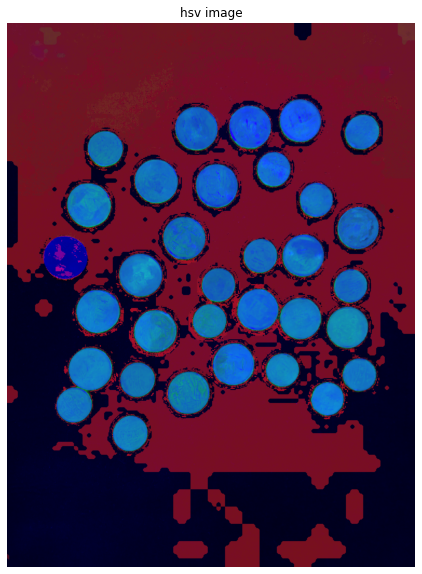

mean hue:  0.0
mean saturation:  0.0
mean value:  54.83703703703704
mean hue:  20.513160714285714
mean saturation:  118.41558928571429
mean value:  176.11423214285716
mean hue:  110.36269430051814
mean saturation:  9.28497409326425
mean value:  58.51813471502591
mean hue:  17.375
mean saturation:  131.5
mean value:  41.625
mean hue:  64.58887545344619
mean saturation:  29.80048367593712
mean value:  42.4558645707376
mean hue:  18.49047388391055
mean saturation:  119.16900783079033
mean value:  201.0064785662388
mean hue:  17.97063003315964
mean saturation:  116.41258819716273
mean value:  162.7135181630058
mean hue:  20.047893390270392
mean saturation:  109.23569364427838
mean value:  168.36904783817116
mean hue:  19.831634369866
mean saturation:  111.78937471546486
mean value:  180.37394350863997
mean hue:  19.4091622776508
mean saturation:  124.67856504024644
mean value:  179.0344231342542
mean hue:  63.15101645692159
mean saturation:  31.515972894482093
mean value:  41.3272023233301

In [86]:
means_hue = []
means_saturation = []
means_value = []

hsv_image = None

# YOUR CODE HERE
img2 = image.copy()
hsv_image = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
plt.figure(figsize=[10,10])
plt.imshow(hsv_image)
plt.title('hsv image')
plt.axis('off')
plt.show()

for cnt in contours:
    contour_mask = np.zeros_like(edged)
    contour_mask = cv2.drawContours(contour_mask, [cnt], -1, (255), -1)
    (mean_hue, mean_saturation, mean_value, _) = cv2.mean(hsv_image, mask=contour_mask)

    means_hue.append(mean_hue)
    means_saturation.append(mean_saturation)
    means_value.append(mean_value)

for i in range(len(contours)):
    print('mean hue: ',means_hue[i])
    print('mean saturation: ',means_saturation[i])
    print('mean value: ',means_value[i])


In [87]:
assert not hsv_image is None
assert len(means_hue)
assert len(means_saturation)
assert len(means_value)


### Exercise 5: Train a model on the data
<b><div style="text-align: right">[POINTS: 2]</div></b>
Use sklearn to train a classification model of your liking on the data.





In [88]:
classifier = None

# YOUR CODE HERE
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split


In [89]:
#dataset
data = coins_df

In [90]:
#separating features and labels
X = data[[
    'radius',
    'mean_hue',
    'mean_saturation',
    'mean_value'
]].values

y= data[[
    'label'
]]
print(X,y)


[[1.76786697e+00 0.00000000e+00 0.00000000e+00 9.71000000e+01]
 [5.00100017e-01 0.00000000e+00 0.00000000e+00 9.45000000e+01]
 [1.11813402e+00 0.00000000e+00 0.00000000e+00 9.50000000e+01]
 ...
 [1.80287564e+00 0.00000000e+00 0.00000000e+00 1.03363636e+02]
 [9.99999975e-05 1.20000000e+02 5.00000000e+00 1.05000000e+02]
 [9.99999975e-05 1.20000000e+02 5.00000000e+00 9.50000000e+01]]      label
0        0
1        0
2        0
3        0
4        0
..     ...
523      0
524      0
525      0
526      0
527      0

[528 rows x 1 columns]


In [91]:
#separating train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [92]:
#fitting SVM classifier model
classifier = svm.SVC()
classifier.fit(X_train,y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [93]:
#testing SVM classifier model
predictions = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'accuracy = {accuracy:.4f}')

accuracy = 0.9528


In [94]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(classifier,f)

In [95]:
assert not classifier is None


### Exercise 6: Classify the circles in the image
<b><div style="text-align: right">[POINTS: 1]</div></b>
Build a numpy array or a pandas dataframe using the features in the image you calculated above and run the classifier on it.

In [96]:
test_data = None # input data to the model
test_labels = None # output from the model

test_labels = []
with open('model.pkl','rb') as f:
  model = pickle.load(f)
# YOUR CODE HERE
test_data = pd.DataFrame({'radius':radii,
                          'mean_hue':means_hue,
                          'mean_saturation':means_saturation,
                          'mean_value':means_value})
test_labels = model.predict(test_data)
print(f'Test labels = {test_labels}')


Test labels = [0 1 0 0 0 1 2 1 1 1 0 2 0 2 2 1 2 2 2 1 1 2 1 0 2 0 2 2 2 1 2 2 1 1 1 2 2
 2]


In [97]:
assert not test_data is None
assert not test_labels is None


### Exercise 7: Count the total money in the image
<b><div style="text-align: right">[POINTS: 2]</div></b>
Using the labels predicted in the above step, calculate the total money in the image.

In [98]:
z = 0
o = 0
t = 0 

# YOUR CODE HERE
for i in test_labels:
    if i==0:
        pass
    elif i==1:
        o+= 1
    else:
        t+= 1


In [99]:
total_money = 0

# YOUR CODE HERE
total_money = o+(t*2)
print(f'Total money= Rs. {total_money}')

Total money= Rs. 47


In [100]:
assert total_money > 0
